### auto correration function(자기 상관 그래프)

$$ 
\begin{align}
autocovariance function:  C_{h} = \dfrac{1}{N}\sum_{t=1}^{N-h} (Y_{t} - \bar{Y} )(Y_{t+h} - \bar{Y} ) 
\tag{1}
\end{align}
$$

$$ 
\begin{align}
variance function:  C_{0} = \dfrac{1}{N}\sum_{t=1}^{N} (Y_{t} - \bar{Y} )^2 
\tag{2}
\end{align}
$$

$$ 
\begin{align}
autocorrelation coefficient:  R_{h} = \dfrac{Autocovariance}{Variance} = \dfrac{ C_{h} }{C_{0} }
\tag{3}
\end{align}
$$

AR,MA를 지정한뒤 ACF와 PACF의 그래프를 그려보면 ARMA모형의 적합성을 판단할 수 있다.
모델 적합성의 가장 큰 증거는 ACF가 점차 감소하는 모습을 띄는 것이다.

In [1]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")

In [62]:
birthDF = pd.read_csv('data5/daily-total-female-births.txt',
                parse_dates=['Date'], index_col='Date')
birthDF

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [10]:
airDF = pd.read_csv('data5/international-airline-passengers.txt',
                   parse_dates=['time'], index_col='time')
airDF

,passengers
time,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [14]:
tempDF = pd.read_csv('data5/daily-min-temperatures.csv',
                    parse_dates=['Date'], index_col='Date')
tempDF

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


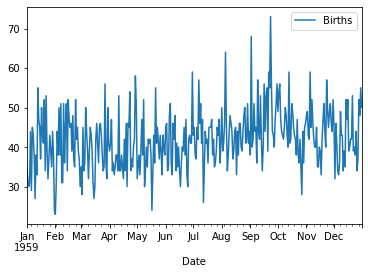

In [15]:
birthDF.plot()
plt.show()

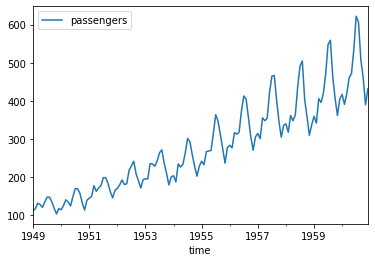

In [16]:
airDF.plot()
plt.show()

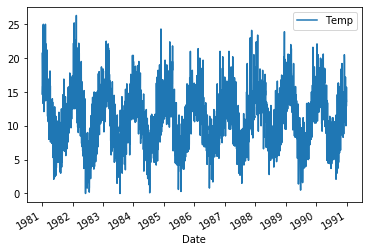

In [17]:
tempDF.plot()
plt.show()

## stationary

In [24]:
n = int( len( birthDF )/2 )
print( birthDF.iloc[:n].mean() )
print( birthDF.iloc[n:].mean() )
print( birthDF.iloc[:n].var() )
print( birthDF.iloc[n:].var() )

Births    39.763736
dtype: float64
Births    44.185792
dtype: float64
Births    49.485308
dtype: float64
Births    48.976281
dtype: float64


## non- stationary

In [25]:
n = int( len( airDF )/2 )
print( airDF.iloc[:n].mean() )
print( airDF.iloc[n:].mean() )
print( airDF.iloc[:n].var() )
print( airDF.iloc[n:].var() )

passengers    182.902778
dtype: float64
passengers    377.694444
dtype: float64
passengers    2275.69464
dtype: float64
passengers    7471.736307
dtype: float64


## stationary??

In [26]:
n = int( len( tempDF )/2 )
print( tempDF.iloc[:n].mean() )
print( tempDF.iloc[n:].mean() )
print( tempDF.iloc[:n].var() )
print( tempDF.iloc[n:].var() )

Temp    11.043507
dtype: float64
Temp    11.312
dtype: float64
Temp    18.170782
dtype: float64
Temp    14.961956
dtype: float64


In [28]:
tempDF['days'] = range(0, len( tempDF))
tempDF

,Temp,days
Date,,
1981-01-01,20.7,0
1981-01-02,17.9,1
1981-01-03,18.8,2
1981-01-04,14.6,3
1981-01-05,15.8,4
...,...,...
1990-12-27,14.0,3645
1990-12-28,13.6,3646
1990-12-29,13.5,3647


In [30]:
temps = tempDF['Temp'].values
days = tempDF['days'].values

In [29]:
tempDF.corr()

,Temp,days
Temp,1.00000,0.01218
days,0.01218,1.00000


In [31]:
np.corrcoef(temps, days )

array([[1.        , 0.01218004],
       [0.01218004, 1.        ]])

In [33]:
temps

array([20.7, 17.9, 18.8, ..., 13.5, 15.7, 13. ])

In [32]:
temps[1:]

array([17.9, 18.8, 14.6, ..., 13.5, 15.7, 13. ])

In [34]:
temps[:-1]

array([20.7, 17.9, 18.8, ..., 13.6, 13.5, 15.7])

In [40]:
np.corrcoef(temps[1:], temps[:-1] )[0,1] #lag1

0.7748702165384456

In [39]:
np.corrcoef(temps[2:], temps[:-2] )[0,1] #lag2

0.6311194620684835

In [41]:
np.corrcoef(temps[3:], temps[:-3] )[0,1]

0.5863748620126276

In [42]:
autocorrelation=[]
for shift in range(1,10):
    c = np.corrcoef(temps[:-shift], temps[shift:] )[0,1]
    autocorrelation.append( c )
autocorrelation

[0.7748702165384458,
 0.6311194620684834,
 0.5863748620126277,
 0.5788976133377611,
 0.5785715744112062,
 0.5765484145122559,
 0.5759289535831577,
 0.5695569780397495,
 0.563474717840828]

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, acf

In [43]:
tempDF['Temp']

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

In [46]:
result = acf( tempDF['Temp'])
result

array([1.        , 0.774268  , 0.6302866 , 0.58529312, 0.57774567,
       0.57728013, 0.57510412, 0.57437039, 0.56782622, 0.56120131,
       0.54668689, 0.53793111, 0.54012564, 0.54247126, 0.53688723,
       0.53429917, 0.53043593, 0.52911166, 0.53037444, 0.52280732,
       0.52303677, 0.52224579, 0.51426684, 0.49837745, 0.49302665,
       0.49946731, 0.50428521, 0.50068173, 0.49157081, 0.48146406,
       0.47421245, 0.47568054, 0.46311862, 0.46215585, 0.46630567,
       0.45459092, 0.43378232, 0.4203594 , 0.42707505, 0.42196486,
       0.4079607 ])

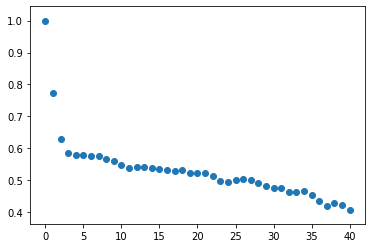

In [51]:
plt.scatter( range(0,len(result ) ), result )
plt.show()

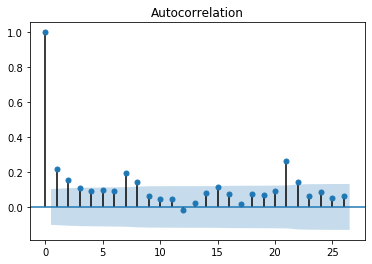

In [54]:
plot_acf( birthDF['Births'] )
plt.show()

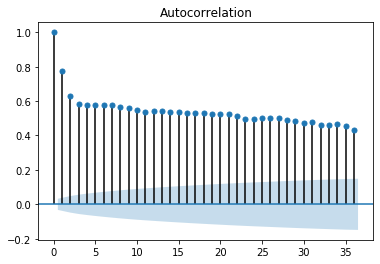

In [52]:
plot_acf( tempDF['Temp'] )
plt.show()

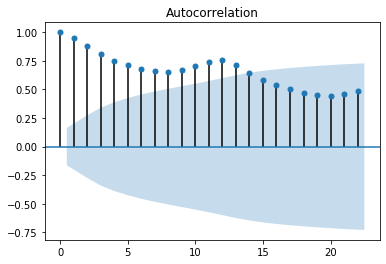

In [56]:
plot_acf( airDF['passengers'] )
plt.show()

In [57]:
from statsmodels.graphics.tsaplots import plot_pacf

## 모델 선택용

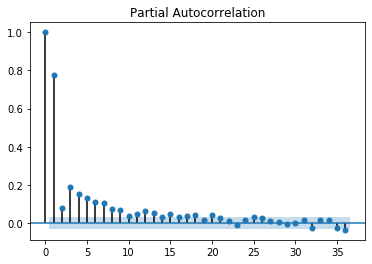

In [58]:
plot_pacf(tempDF['Temp']  )
plt.show()

### adfuller 판단지표

In [59]:
from statsmodels.tsa.stattools import adfuller

#### 검증 조건 ( p-value : 5% 이내면 reject으로 대체가설 선택됨 )
- 귀무가설(H0): non-stationary.
- 대체가설 (H1): stationary.

In [63]:
result = adfuller( birthDF['Births'] )
print( result[0] ) # adf ( 작을수록 :귀무가설을 기각시킬 확율이 높다)
print( result[1] ) # p-value( 귀무가설기각: stationary)

-4.808291253559759
5.243412990149989e-05


In [65]:
result = adfuller( airDF['passengers'] )
print( result[0] ) #adf ( 클수록: 귀무가설채틱 확률이 높다 )
print( result[1] ) # p-value( 귀무가설채택: non-stationary )

0.8153688792060587
0.9918802434376411


In [66]:
order = (2,1,2)
model = ARIMA(airDF, order ) 
rfit = model.fit()
rfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.711
Date:                Wed, 27 Jan 2021   AIC                           1344.043
Time:                        11:19:02   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.5311      0.708      3.574      0.000       1.143       3.919
ar.L1.D.passengers     1.6477      0.033     49.933      0.000       1.583       1.712
ar.L2.D.passengers    -0.9094      0.033    -27.880      0.000      -0.973      -0.845
ma.L1.D.passengers    -1.9101      0.065    -29.533      0.000      -2.037      -1.783
ma.L2.D.passengers     0.9999      0.068     14.810      0.000       0.868       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9551           -0.2964j            1.0000           -0.0479
MA.2            0.9551           +0.2964j            1.0000            0.0479
-----------------------------------------------------------------------------
"""

In [69]:
rfit.aic

1344.043384283314

ARIMA(2,1,2)
\begin{equation}
y_t = 1.6477 y'_{t-1} -0.9094 y'_{t-2} + e_t -1.9101e_{t-1} +0.9999e_{t-2}
\end{equation}
</h3>
를 따르는 ARIMA모델임을 확인할 수 있다.

In [67]:
def arima_aic_check(data, order,sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_lsit = []
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(data, order=(p,d,q))
                try:
                    model_fit = model.fit()
                    c_order = f'p:{p} d:{d} q:{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except:
                    pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)),columns=['order','AIC'])
    result_df.sort_values(sort, inplace=True)
    return result_df

In [68]:
arima_aic_check( airDF, [3,3,3] )

,order,AIC
21,p:2 d:1 q:2,1344.043384
20,p:2 d:1 q:1,1361.695820
13,p:1 d:1 q:2,1371.815374
15,p:1 d:2 q:2,1393.908442
23,p:2 d:2 q:2,1394.656208
7,p:0 d:2 q:2,1396.371696
19,p:2 d:1 q:0,1397.975152
4,p:0 d:1 q:2,1398.385532
3,p:0 d:1 q:1,1398.827110
12,p:1 d:1 q:1,1402.145400


In [72]:
rfit.predict(1, 10, typ='levels')

1949-02-01    114.531094
1949-03-01    121.350876
1949-04-01    137.221280
1949-05-01    129.789542
1949-06-01    119.169478
1949-07-01    136.762399
1949-08-01    149.739047
1949-09-01    147.367306
1949-10-01    134.798658
1949-11-01    121.077000
Freq: MS, dtype: float64

In [73]:
rfit.predict('1950-01-01','1950-12-01' , typ='levels')

1950-01-01    131.476220
1950-02-01    132.058307
1950-03-01    143.953541
1950-04-01    156.328568
1950-05-01    147.710772
1950-06-01    136.542373
1950-07-01    155.854037
1950-08-01    168.939846
1950-09-01    162.271160
1950-10-01    147.633338
1950-11-01    126.286687
1950-12-01    115.225320
Freq: MS, dtype: float64

In [88]:
# preds =rfit.predict('1960-07-01','1960-12-01' , typ='levels')
preds =rfit.predict('1960-07-01','1961-07-01' , typ='levels')

In [74]:
train = airDF[:'1960-07-01']
test = airDF['1960-07-01':]

In [90]:
preds

1960-07-01    553.884492
1960-08-01    599.046629
1960-09-01    555.150170
1960-10-01    458.019625
1960-11-01    421.197673
1960-12-01    378.526921
1961-01-01    433.101130
1961-02-01    450.852664
1961-03-01    479.763140
1961-04-01    511.918638
1961-05-01    539.273154
1961-06-01    555.766009
1961-07-01    558.727895
Freq: MS, dtype: float64

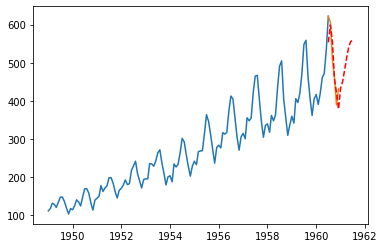

In [89]:
plt.plot( train )
plt.plot( test )
plt.plot( preds, 'r--')
plt.show()

In [70]:
airDF

,passengers
time,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [91]:
df = pd.DataFrame([
        ['2001-11-01', 0.998543],
        ['2001-11-02', 1.914526],
        ['2001-11-03', 3.057407],
        ['2001-11-04', 4.044301],
        ['2001-11-05', 4.952441],
        ['2001-11-06', 6.002932],
        ['2001-11-07', 6.930134],
        ['2001-11-08', 8.011137],
        ['2001-11-09', 9.040393],
        ['2001-11-10', 10.097007],
        ['2001-11-11', 11.063742],
        ['2001-11-12', 12.051951],
        ['2001-11-13', 13.062637],
        ['2001-11-14', 14.086016],
        ['2001-11-15', 15.096826],
        ['2001-11-16', 15.944886],
        ['2001-11-17', 17.027107],
        ['2001-11-18', 17.930240],
        ['2001-11-19', 18.984202],
        ['2001-11-20', 19.971603]
    ], columns=['date', 'count'])
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')
df = df.set_index('date')
print(df)

                count
date                 
2001-11-01   0.998543
2001-11-02   1.914526
2001-11-03   3.057407
2001-11-04   4.044301
2001-11-05   4.952441
2001-11-06   6.002932
2001-11-07   6.930134
2001-11-08   8.011137
2001-11-09   9.040393
2001-11-10  10.097007
2001-11-11  11.063742
2001-11-12  12.051951
2001-11-13  13.062637
2001-11-14  14.086016
2001-11-15  15.096826
2001-11-16  15.944886
2001-11-17  17.027107
2001-11-18  17.930240
2001-11-19  18.984202
2001-11-20  19.971603


In [ ]:
## acf, adfuller, 예측( 2001-11-13, 2001-11-20)

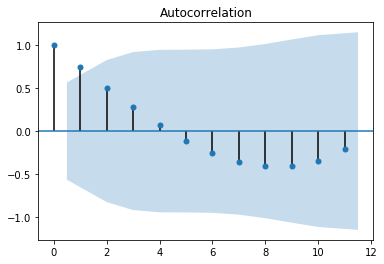

In [92]:
# 2011-11-13 기준으로 train, test 나누기
train=df[:'2001-11-12']
test=df['2001-11-13':]

# acf로 non-stationary 여부 확인
plot_acf(train['count'])
plt.show() # non-stationary

In [93]:
# adfuller로 non-stationary 여부 확인
result=adfuller(train['count'])
print(result[0])
print(result[1]) # p-value 값 0.93 -> 귀무가설 채택 -> non-stationary

-0.2727060313249684
0.9292820059517111


In [94]:
# 가장 작은 AIC 만드는 ARIMA 조합 찾기
arima_aic_check(train, [3,3,3]) # 0, 1, 1 선택

,order,AIC
4,p:0 d:1 q:1,-26.732532
5,p:0 d:1 q:2,-24.732845
10,p:1 d:1 q:0,-23.740628
3,p:0 d:1 q:0,-22.957058
13,p:2 d:1 q:0,-22.471244
8,p:0 d:2 q:2,-16.234061
7,p:0 d:2 q:1,-15.186843
14,p:2 d:2 q:0,-13.355062
11,p:1 d:2 q:0,-12.757724
6,p:0 d:2 q:0,-9.447776


In [95]:
# ARIMA 모델 학습
order=(0,1,1)
model=ARIMA(train, order)
model.fit()

In [1]:
# 예측 및 그래프로 나타내기
pred=model.fit().predict('2001-11-13', '2001-11-20', typ="levels")
plt.plot(train) 
plt.plot(pred, 'r--') # 실제 데이터(test)와 거의 일치
plt.plot(test)
plt.show()

NameError: name 'model' is not defined